In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/austindataset/austinHousingData.csv


# Overview

In [2]:
# Load the dataset
df = pd.read_csv('../input/austindataset/austinHousingData.csv')

### DataSet Snapshot

In [3]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


### DataSet Statistcs

In [4]:
df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


# Feature Engineering
Feature engineering is the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. This is the foremost step and it's key for the model to perform well. 

### Dropping pointless attributes 
On looking at the data provided it is easy to find some of the columns don't add much value or can't be used for regression purposes. 
**description** and **streetAddress** requires text parsing to get any useful information. 
**homeImage** and **zpid** are random identifiers which doesn't provide any information. 
**latestPriceSource** is not correlated with price. 
Hence, these attributes are dropped.

In [5]:
df.drop(columns=['description', 'streetAddress', 'homeImage', 'latestPriceSource', 'zpid'], inplace=True)

### Boolean to Integer type conversion
We then convert boolean data types to its corresponding integers.

In [6]:
df['hasAssociation'] = df['hasAssociation'] * 1
df['hasGarage'] = df['hasGarage'] * 1
df['hasCooling'] = df['hasCooling'] * 1
df['hasHeating'] = df['hasHeating'] * 1
df['hasSpa'] = df['hasSpa'] * 1
df['hasView'] = df['hasView'] * 1

### Nominal to Numerical Attribute conversion

We then look at some of the Nominal data that's present and try to convert these to a meaningful numerical attribute. To add meaning to the resultant integers we see how different attriubtes affect the price. We map the lowest mean price to integer value of 1 and increase it from there.


In [7]:
tempdf = df[["city","latestPrice", "livingAreaSqFt"]].groupby(['city']).mean()
tempdf['avgPricePerSqFt'] = tempdf["latestPrice"]/tempdf["livingAreaSqFt"]
tempdf

,latestPrice,livingAreaSqFt,avgPricePerSqFt
city,,,
austin,5.147851e+05,2209.984487,232.936066
del valle,1.970358e+05,1646.558140,119.665278
driftwood,7.531492e+05,3642.000000,206.795488
dripping springs,8.916430e+05,3908.800000,228.111697
manchaca,3.404530e+05,1831.000000,185.938285
manor,3.427817e+05,2235.333333,153.347003
pflugerville,2.855341e+05,1993.805556,143.210583
road,4.790000e+05,4098.000000,116.886286
west lake hills,1.425000e+06,4437.000000,321.162948


In [8]:
df['city'].replace(['road', 'del valle', 'pflugerville', 'manor', 'manchaca', 'driftwood', 'dripping springs', 'austin', 'west lake hills'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

We repeat the above process for homeType as well.

In [9]:
tempdf = df[["homeType","latestPrice", "livingAreaSqFt"]].groupby(['homeType']).mean()
tempdf['avgPricePerSqFt'] = tempdf["latestPrice"]/tempdf["livingAreaSqFt"]
tempdf


,latestPrice,livingAreaSqFt,avgPricePerSqFt
homeType,,,
Apartment,487753.729730,1932.243243,252.428741
Condo,406016.100000,1498.461702,270.955273
Mobile / Manufactured,274676.294118,1457.411765,188.468558
MultiFamily,700725.000000,2866.700000,244.436111
Multiple Occupancy,429663.614583,2215.020833,193.977234
Other,586566.666667,1992.000000,294.461178
Residential,565823.675676,2580.864865,219.238009
Single Family,516387.884629,2234.634506,231.083823
Townhouse,424719.545977,1728.218391,245.755715


In [10]:
df['homeType'].replace(['Mobile / Manufactured', 'Multiple Occupancy', 'Residential', 'Single Family', 'MultiFamily', 'Townhouse',  'Apartment', 'Condo', 'Vacant Land', 'Other'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

### Normalize Date Type Attributes 
The next step is to normalize the date attributes. We use a simple way to do this, we subtract the year attribute from the its maximum value. This gives us a scale of zero to oldest year. We can ignore the month and day attribute because it's effect is minimal.

In [11]:
df["age"] = df["yearBuilt"].max() - df["yearBuilt"]
df.drop(columns=["yearBuilt"], inplace=True)
df['age'].value_counts()

14     496
21     400
15     399
13     394
37     358
      ... 
114      1
109      1
112      1
102      1
115      1
Name: age, Length: 115, dtype: int64

In [12]:
df.drop(columns=['latest_saledate', 'latest_salemonth'], inplace=True)
df['saleAge'] = df['latest_saleyear'].max() - df['latest_saleyear']
df.drop(columns=["latest_saleyear"], inplace=True)
df['saleAge'].value_counts()

1    5416
2    5277
3    4395
0      83
Name: saleAge, dtype: int64

### Reduce school type attributes.
There are multiple attributes representing the count of different types of schools present. Since all of them pretty much infers to one thing we'll keep only the total number of schools

In [13]:
df['numOfSchools'] = df['numOfPrimarySchools'] + df['numOfElementarySchools'] + df['numOfMiddleSchools'] + df['numOfHighSchools']
df.drop(columns=["numOfPrimarySchools", "numOfElementarySchools", "numOfMiddleSchools", "numOfHighSchools"], inplace=True)

### Reducing different types of amenities.
Similarly there are multiple attributes the gives us different features present in the house. Since the features are fine grained they don't correlate well with the price. We can add them to find the total number of amenities provided which better represents the price.

In [14]:
df['numOfAmenities'] = df['numOfAccessibilityFeatures'] + df['numOfAppliances'] + df['numOfParkingFeatures'] + df['numOfPatioAndPorchFeatures'] 
+ df['numOfSecurityFeatures'] + df['numOfWaterfrontFeatures'] + df['numOfWindowFeatures'] + df['numOfCommunityFeatures']; 
df.drop(columns=["numOfAccessibilityFeatures","numOfAppliances","numOfParkingFeatures","numOfPatioAndPorchFeatures","numOfSecurityFeatures",
                 "numOfWaterfrontFeatures","numOfWindowFeatures","numOfCommunityFeatures"])

,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,age,saleAge,numOfSchools,numOfAmenities
0,3,78660,30.430632,-97.663078,1.98,2,1,1,1,1,...,2.666667,1063,14,3.0,4,2,8,2,3,8
1,3,78660,30.432673,-97.661697,1.98,2,1,1,1,1,...,2.666667,1063,14,2.0,4,1,7,1,3,3
2,3,78660,30.409748,-97.639771,1.98,0,1,1,0,1,...,3.000000,1108,14,2.0,3,1,2,2,4,5
3,3,78660,30.432112,-97.661659,1.98,2,1,1,1,1,...,2.666667,1063,14,2.0,3,1,7,3,3,2
4,3,78660,30.437368,-97.656860,1.98,0,1,1,0,1,...,4.000000,1223,14,3.0,3,2,18,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,8,78748,30.161997,-97.816345,1.98,6,0,1,1,1,...,3.333333,1424,14,2.0,3,1,34,1,3,9
15167,8,78741,30.240223,-97.772835,1.98,2,1,1,1,1,...,6.666667,1226,16,4.0,3,3,4,1,3,10
15168,8,78704,30.244835,-97.761124,1.98,2,0,1,1,1,...,5.000000,889,13,3.0,3,2,84,0,3,6
15169,8,78722,30.281569,-97.717789,1.98,0,0,1,0,1,...,6.666667,1057,15,2.0,4,1,52,2,3,4


# Data Visualization and Interpretation
Another important step before we train the data is to try and visualize different data we have to find it's importance. These give us insights to improve on the model.

### Propery Heat Map
We will now be using the latitudes and longitude details provided to locate them in a heat map.


In [15]:
import folium
from folium.plugins import HeatMap

# define a function to draw a basemap easily
def generateBaseMap(default_location=[30.2672, -97.7431], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

tempdf = df.copy()
tempdf['count'] = 1
austinmap = generateBaseMap()

# add carton position map
folium.TileLayer('cartodbpositron').add_to(austinmap)
folium.FeatureGroup(name='icon').add_to(austinmap)

# add heatmap
HeatMap(data=tempdf[['latitude','longitude','count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(austinmap)
folium.LayerControl(collapsed=False).add_to(austinmap)
austinmap

### Pearson Correlation matrix
This matrix tells us how different attributes are corelated with each other. A value of +1 means they are highly positively corelated and -1 means they are highly negatively corelated. 

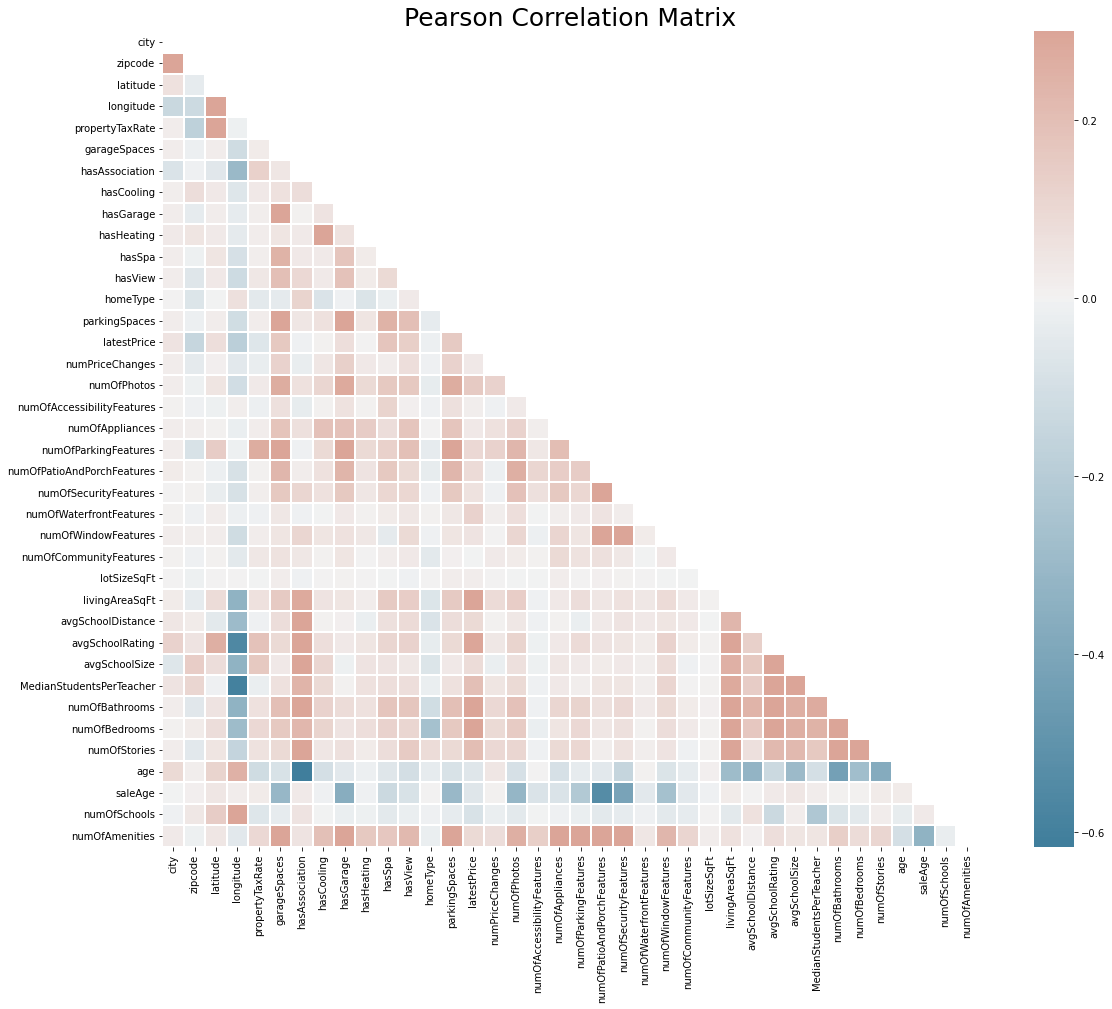

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
ax.set_title('Pearson Correlation Matrix', fontsize=25)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": 1})

### Data distribution
Next we look at the data distribution of all the attributes. As you can see most of them follow a normal distribution.

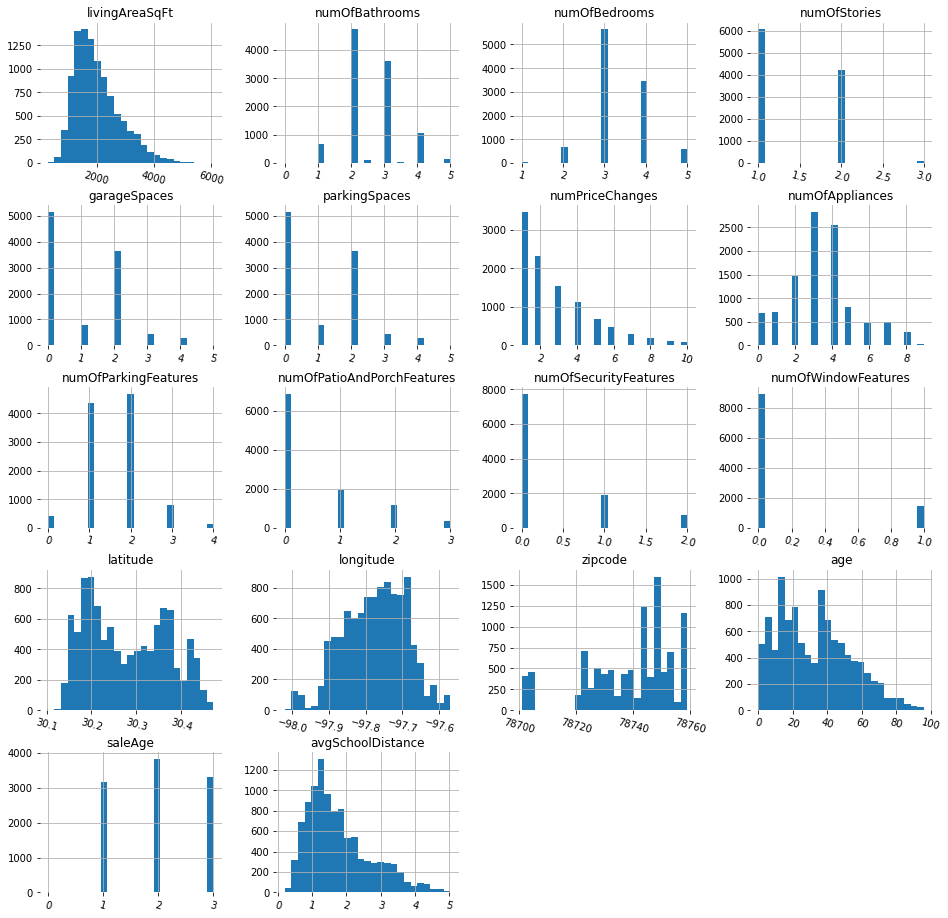

In [17]:
from scipy import stats

tempdf=df[['livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms',
    'numOfStories', 'garageSpaces', 'parkingSpaces', 'numPriceChanges',
    'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
    'numOfWindowFeatures', 'latitude', 'longitude', 'zipcode', 'age', 'saleAge', 'avgSchoolDistance']]
tempdf = tempdf[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
h = tempdf.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

### Box Plots
Various boxplots below show how they relate with the price. We can also find where the 25th, 50th, 75th percentile falls on. All of them are positively corelated and hence with an increase in the feature value the price increases as well.

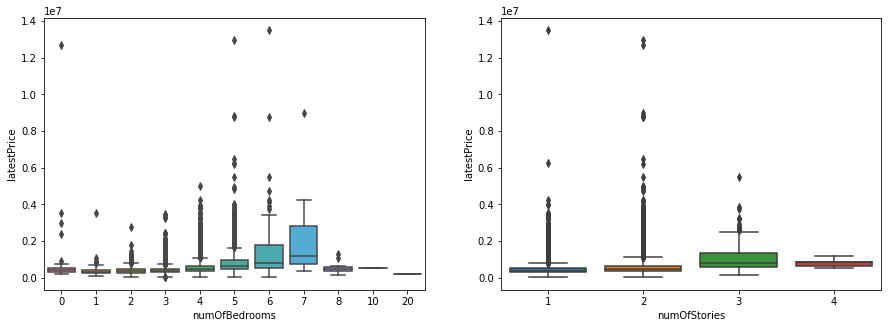

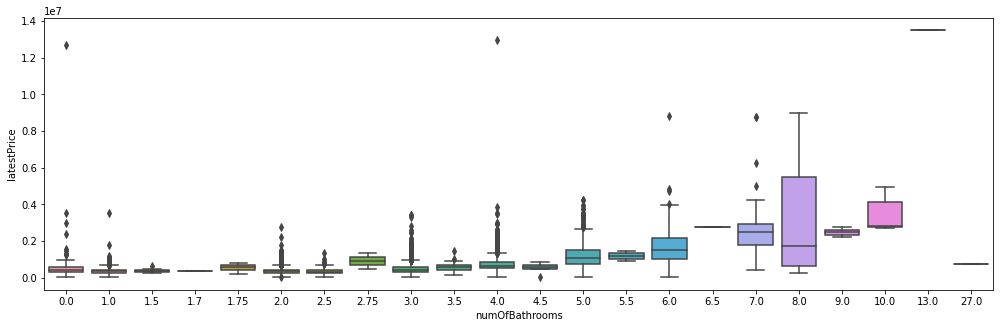

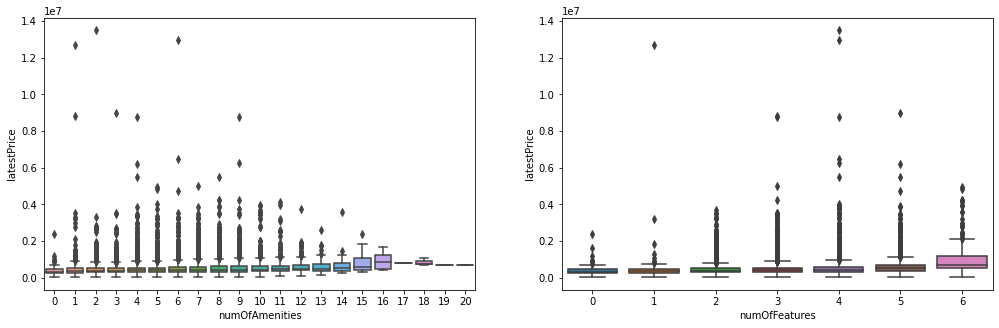

In [18]:
_, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=df['numOfBedrooms'], y=df['latestPrice'], ax=axes[0])
sns.boxplot(x=df['numOfStories'], y=df['latestPrice'], ax=axes[1])

_, axes = plt.subplots(1,1, figsize=(17,5))
sns.boxplot(x=df['numOfBathrooms'], y=df['latestPrice'], ax=axes)

_, axes = plt.subplots(1,2, figsize=(17,5))
sns.boxplot(x=df['numOfAmenities'], y=df['latestPrice'], ax=axes[0])
_ = sns.boxplot(x=df['hasAssociation'] + df['hasCooling'] + df['hasGarage'] + df['hasHeating'] + df['hasSpa'] + df['hasView'], y=df['latestPrice'], ax=axes[1]).set(xlabel="numOfFeatures")

### 3-D Plot

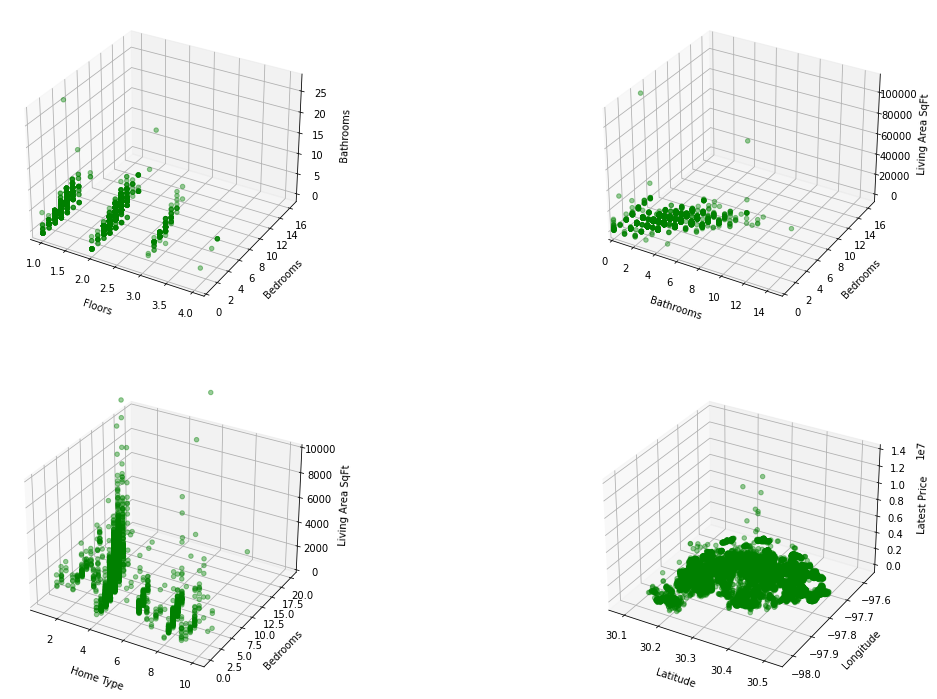

In [19]:
fig = plt.figure(figsize=(19,12.5))
ax = fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['numOfStories'],df['numOfBedrooms'],df['numOfBathrooms'], c="g",alpha=.4)
ax.set(xlabel='\nFloors', ylabel='\nBedrooms', zlabel='\nBathrooms')
ax.set(ylim=[0,17])

ax = fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['homeType'],df['numOfBedrooms'],df['livingAreaSqFt'], c="g",alpha=.4)
ax.set(xlabel='\nHome Type', ylabel='\nBedrooms', zlabel='\nLiving Area SqFt')
ax.set(zlim=[0,10000])

ax = fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['numOfBathrooms'],df['numOfBedrooms'],df['livingAreaSqFt'], c="g",alpha=.4)
ax.set(xlabel='\nBathrooms', ylabel='\nBedrooms', zlabel= '\nLiving Area SqFt')
ax.set(xlim=[0,15])
ax.set(ylim=[0,17])

ax = fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['latitude'], df['longitude'], df['latestPrice'], c="g",alpha=.4)
_ = ax.set(xlabel='\nLatitude', ylabel='\nLongitude', zlabel= '\nLatest Price')

### Model Evaluation Parameters
There are multiple parameters for evaluating our model. Before we train the model it's important to decide on these parameters. For regression on large values like housePrice we found that Mean Absolute Error(MAE),Root Mean Squared Error(RMSE), R-squared, K-Fold Cross Validation to be the best parameters to decide the efficiency of the model.

In [20]:
table = pd.DataFrame({'Model Type': [],
                           'Mean Absolute Error': [],
                           'Root Mean Squared Error (RMSE)': [],
                           'R-squared': [],
                           'K-Fold Cross Validation': []})

def evaluateModel(model, X_test, Y_pred, Y_test, X, Y, title):
    mae = metrics.mean_absolute_error(Y_pred, Y_test)
    rmse =  np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
    r = model.score(X_test, Y_test)
    kfcv = cross_val_score(model,X, Y,cv=5).mean()
    temp = table.shape[0]
    table.loc[temp] = [title,mae,rmse,r,kfcv]
    display(table)

### Data Cleaning
The dataset also contains a lot of outliears which affects the accuracy. It's essential to buid a model that's robust and is not affected by these outliers. To see the effect of outliears we'll do a simple regression using only Living Space. We can then try the same but with cleaned data and compare the accuracy of both. 

### Simple Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def simpleRegression(inputData, title):
    train_data,test_data = train_test_split(inputData,test_size = 0.2,random_state=3)

    model = linear_model.LinearRegression()
    X_train = np.array(train_data['livingAreaSqFt'], dtype=pd.Series).reshape(-1,1)
    Y_train = np.array(train_data['latestPrice'], dtype=pd.Series)
    model.fit(X_train,Y_train)

    X_test = np.array(test_data['livingAreaSqFt'], dtype=pd.Series).reshape(-1,1)
    Y_test = np.array(test_data['latestPrice'], dtype=pd.Series)

    Y_pred = model.predict(X_test)

    plt.figure(figsize=(6.5,5))
    plt.scatter(X_test,Y_test,color='darkgreen',label="Data", alpha=.1)
    plt.plot(X_test,model.predict(X_test),color="red",label="Predicted Regression Line")
    plt.xlabel("Living Space (sqft)", fontsize=15)
    plt.ylabel("Price ($)", fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)   
    
    X = np.array(df['livingAreaSqFt'], dtype=pd.Series).reshape(-1,1)
    Y = df['latestPrice']
    evaluateModel(model,X_test,Y_pred,Y_test,X,Y,title)

### Uncleaned Data

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.76809,379698.99707,0.320327,0.164109


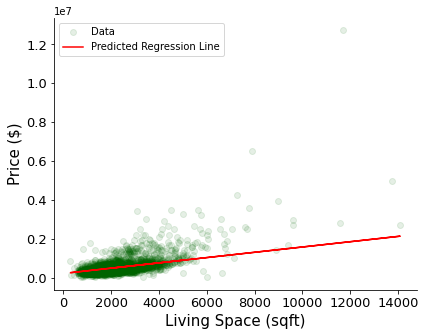

In [22]:
simpleRegression(df, "Simple Regression - Uncleaned Data")

### Cleaned Data

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109


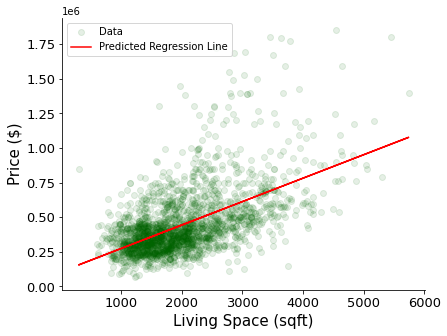

In [23]:
simpleRegression(df[(np.abs(stats.zscore(df)) < 3).all(axis=1)], "Simple Regression Cleaned Data")

We can see that the cleaned data has much better accuracy, hence moving forward we'll be using the cleaned data. For cleaning the data we use the Z-Score value. Absolute Z-Score value of more than 3 is considered as outlier.

In [24]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### Dataset preparation

In [25]:
features = ['livingAreaSqFt',
'lotSizeSqFt',
            
'zipcode',
'latitude',
'longitude',
 
'hasAssociation',
'hasCooling',
'hasGarage',
'hasHeating',
'hasSpa',
'hasView',
            
'age',
'saleAge',
'homeType',
'city',    
 
'propertyTaxRate',
 
'avgSchoolDistance',
'avgSchoolRating',
'avgSchoolSize',
'MedianStudentsPerTeacher',
      
'numOfBathrooms',
'numOfBedrooms',  
'numOfStories',
'garageSpaces',
'parkingSpaces',
'numPriceChanges',
            
'numOfAmenities',
'numOfPhotos',
'numOfSchools'
]

train_data,test_data = train_test_split(df,test_size = 0.2,random_state=3)
X = df[features]
Y = df['latestPrice']
X_train = np.array(train_data[features], dtype=pd.Series)
Y_train = np.array(train_data['latestPrice'], dtype=pd.Series)
X_test = np.array(test_data[features], dtype=pd.Series)
Y_test = np.array(test_data['latestPrice'], dtype=pd.Series)

### Linear Regression
We first perform a simple linear regression using all the features defined above. 

In [26]:
def regression(title):
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    evaluateModel(model, X_test, Y_pred, Y_test, X, Y, title)
    
regression("Linear Regression")    

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496


We can see a great improvement in the MAE. Thus we can infer that the increase in the number of features improves the accuracy of the model.

### Ridge Regression
Next we use ridge regression to prevent any over fitting that might have happened. The regression penalizes high coefficients. We also try different learning rates to find out the best one.

In [27]:
def ridgeRegression(alpha, title):
    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    evaluateModel(model, X_test, Y_pred, Y_test, X, Y, title)
ridgeRegression(0.1, "Ridge Regression{alpha=0.1}") 
ridgeRegression(1, "Ridge Regression{alpha=1}") 
ridgeRegression(10, "Ridge Regression{alpha=10}") 

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536


,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260


,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268


### Lasso Regression


With the model not improving much, we shall try Lasso regression with different learning rates. 

In [28]:
def lassoRegression(alpha, title):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    evaluateModel(model, X_test, Y_pred, Y_test, X, Y, title)
lassoRegression(0.1, "Lasso Regression{alpha=0.1}")
lassoRegression(1, "Lasso Regression{alpha=1}")
lassoRegression(10, "Lasso Regression{alpha=10}")


,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268
6,Lasso Regression{alpha=0.1},103053.219977,148336.835350,0.594295,0.444490


,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268
6,Lasso Regression{alpha=0.1},103053.219977,148336.835350,0.594295,0.444490
7,Lasso Regression{alpha=1},103039.397349,148333.763316,0.594312,0.444465


,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268
6,Lasso Regression{alpha=0.1},103053.219977,148336.835350,0.594295,0.444490
7,Lasso Regression{alpha=1},103039.397349,148333.763316,0.594312,0.444465
8,Lasso Regression{alpha=10},102943.626637,148340.228126,0.594277,0.443908


### Huber Loss Regression
We finally try Huber Loss Regression for any potential improvements.

In [29]:
def huberLossRegression(alpha, title):
    model = linear_model.HuberRegressor(alpha=alpha)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    evaluateModel(model, X_test, Y_pred, Y_test, X, Y, title)
huberLossRegression(0.01, "Huber Loss Regression{alpha=0.01}")

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268
6,Lasso Regression{alpha=0.1},103053.219977,148336.835350,0.594295,0.444490
7,Lasso Regression{alpha=1},103039.397349,148333.763316,0.594312,0.444465
8,Lasso Regression{alpha=10},102943.626637,148340.228126,0.594277,0.443908
9,Huber Loss Regression{alpha=0.01},116212.409874,190188.504023,0.333070,0.242382


As you can see from the above results none of the regression model improves upon the Linear Regression we carried out earlier. This makes us to conclude that there wasn't any overfitting in the original model.

### Polynomial Regression
We now try Polynomial Regression of degree-2 using basis function expansion. This can help us improve the accuracy if there is any quadratic dependency between the attributes and price. 

In [30]:
from sklearn.preprocessing import PolynomialFeatures

def polynomialRegression(degree, title):
    basisFunc = PolynomialFeatures(degree=degree)
    X_allpoly = basisFunc.fit_transform(df[features])
    X_train_poly = basisFunc.fit_transform(X_train)
    X_test_poly = basisFunc.fit_transform(X_test)
    model = linear_model.LinearRegression().fit(X_train_poly, Y_train)
    Y_pred = model.predict(X_test_poly)
    evaluateModel(model, X_test_poly, Y_pred, Y_test, X_allpoly, Y, title)
    
polynomialRegression(2, "Polynomial Regression{degree=2}")

,Model Type,Mean Absolute Error,Root Mean Squared Error (RMSE),R-squared,K-Fold Cross Validation
0,Simple Regression - Uncleaned Data,188567.768090,379698.997070,0.320327,0.164109
1,Simple Regression Cleaned Data,136552.288874,195383.265117,0.296139,0.164109
2,Linear Regression,103054.755825,148337.214230,0.594293,0.444496
3,Ridge Regression{alpha=0.1},102972.271467,148570.391591,0.593017,0.444536
4,Ridge Regression{alpha=1},103286.594074,149073.350217,0.590257,0.443260
5,Ridge Regression{alpha=10},103244.948489,149274.342625,0.589151,0.448268
6,Lasso Regression{alpha=0.1},103053.219977,148336.835350,0.594295,0.444490
7,Lasso Regression{alpha=1},103039.397349,148333.763316,0.594312,0.444465
8,Lasso Regression{alpha=10},102943.626637,148340.228126,0.594277,0.443908
9,Huber Loss Regression{alpha=0.01},116212.409874,190188.504023,0.333070,0.242382


Performing Polynomial Regression of degree-2 improved the accuracy tremendously. With a Mean Absolute Error of 80K it is our best performing model.